# Analyzing Loan Data from Lending Club

### University of California, Santa Barbara
#### Department of Probability and Statistics
#### PSTAT 131 Final Project
#### Luis Aragon, Peggy Xu, Ronak Parikh, Sam Sheridan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Introduction 

Lending Club is a peer to peer lending network that allows individuals to apply for personal loans up to \\$ 40,000 or business loans up to \\$ 300,000. The loans are funded by individuals who have invested in Lending Club. Investors can browse the various loans and choose the ones they want to fund – they then profit from the interest payments. Lending Club provides its anonymized loan data for both accepted and rejected applicants. We downloaded the data and attempted to visualize it to find trends among borrowers.

Some questions that we wanted to answer through our analysis include:

-How do loan amounts and interest rates differ by state?

-What is the average low-grade/high-grade loan profile? Does loan quality differ for people with various living situations?

-Do certain words in the loan descriptions correlate with higher loan grade quality? What are the common reasons for loans?



## Data

The data set obtained from Lending Club contains information on the borrowers. For the accepted borrowers, it provides a description of what the loan is for: the risk group, amount requested, application date, interest rates, and several other columns. For the denied borrowers, the columns show the amount requested, loan title, credit score, employment length, and debt to income ratio.

In [3]:
# Load in Data
loan_data = pd.read_csv("LoanStats3a.csv", header=1, low_memory=False)
reject_data = pd.read_csv('RejectStatsA.csv', header=1, low_memory=False)

In [4]:
# View
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# View
reject_data.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


## Question 1: How do loan amounts and interest rates differ by state?

In [6]:
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '')
loan_data['int_rate'] = loan_data['int_rate'].astype(float)

How do loan amounts, interest rates, and income level differ by state for Lending Club users?

First, we group the states to look at the average interest rates in each state using a pandas groupby.

In [7]:
intPerState = loan_data.groupby(['addr_state']).mean()['int_rate']
intPerState.head()

addr_state
AK    12.860930
AL    11.963368
AR    11.754368
AZ    12.332219
CA    12.219812
Name: int_rate, dtype: float64

We then pip install plotly to illustrate our results.

In [8]:
!pip install plotly

In [9]:
import plotly.plotly as py 
import plotly.graph_objs as go 

# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  
# To establish connection 
init_notebook_mode(connected = True) 
  
   #plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: all states 
            locations = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", 
          "ME", "MI", "MN", "MO", "MS", "MT", "NC", "NE", "NH", "NJ", 
          "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'YlGnBu',
            
            z = intPerState, 
            colorbar = {'title': 'Interest Rates by State'}) 
           
         
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 

# plotting graph 
iplot(choromap)

To our surprise, interest rates in Maine are the lowest relative to the rest of the US. Interest rates are also relatively low in Vermont and South Dakota, while interest rates in Alaska and Nebraska appear to be high relative to other states. The range of interest rates are approximately between 10.5% and 13%. For the most part, interest rates on West Coast and East Coast are higher than those in Midwest.

Next, we will look at annual income by US and see how it relates to interest rates by state. Again, we group the states and now look at the average annual income in each state using a pandas groupby.

In [10]:
annual_inc = loan_data.groupby(['addr_state']).mean()['annual_inc']
annual_inc.head()

addr_state
AK    78902.430698
AL    63275.835661
AR    59946.404674
AZ    67799.876420
CA    72221.438542
Name: annual_inc, dtype: float64

We were then able to plot the income by state using the same function in plotly.

In [11]:
#plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: all states 
            locations = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", 
          "ME", "MI", "MN", "MO", "MS", "MT", "NC", "NE", "NH", "NJ", 
          "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'YlGnBu',
            
            z = annual_inc, 
            colorbar = {'title': 'Income by State'}) 
           
         
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 

# plotting graph 
iplot(choromap)

The income by state is very similar to the interest rate by state with the exception of Indiana, which has a very low income amount among Lending Club users. Midwestern states have lower incomes, while East and West Coast states have higher incomes. North Dakota is filled in white because there is no income data for the state.

Next, we plotted the distribution of borrower income within 3 standard deviations of the mean borrower income to help understand the socioeconomic status of Lending Club borrowers.


In [12]:
accepted_inc = loan_data['annual_inc']
accepted_inc = accepted_inc[((accepted_inc - accepted_inc.mean()).abs() < (3 * accepted_inc.std()))]

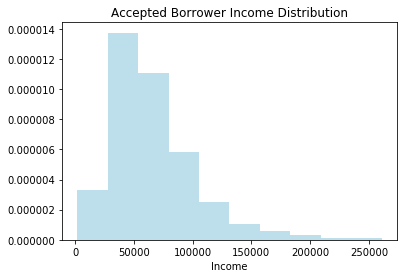

In [13]:
plt.hist(accepted_inc, density=True, alpha=0.8, color = 'lightblue')
plt.title("Accepted Borrower Income Distribution")
plt.xlabel("Income")
plt.show()

Lastly, we decided to look at loan amounts per US State using the same process as above.

In [14]:
loan_amnt_per_State = loan_data.groupby(['addr_state']).mean()['loan_amnt']

In [15]:
#plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: all states 
            locations = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", 
          "ME", "MI", "MN", "MO", "MS", "MT", "NC", "NE", "NH", "NJ", 
          "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'YlGnBu',
            
            z = loan_amnt_per_State, 
            colorbar = {'title': 'Loan amount by State'}) 
           
         
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 

# plotting graph 
iplot(choromap)

The loan amounts by state were nearly identical to the income by state, but again still slightly different than interest rates by state. This makes sense because users living in states with higher incomes also tend to heave higher cost of living, which may cause people to take out bigger loans. Maine is by far the state with the lowest loan amounts.

## Question 2: What is the average high-grade/low-grade loan profile?

First, we will analyze the interest rates and see how they differ by loan grade.

In [16]:
# group by grade and look at interest rate
grade_interest_rates = loan_data.groupby('grade').mean()['int_rate']

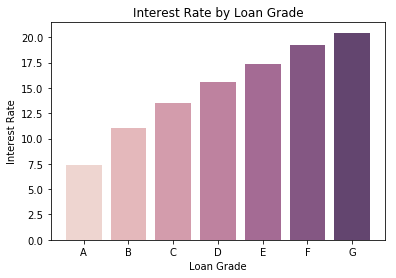

In [17]:
# Plot Loan Grade vs Interest Rate
plt.bar(grade_interest_rates.index, grade_interest_rates, color = sns.cubehelix_palette(8), alpha = 0.9)
plt.title("Interest Rate by Loan Grade")
plt.xlabel('Loan Grade')
plt.ylabel("Interest Rate")
plt.show()

We were curious about Lending Club's interest rates, so we plotted the average interest rate by loan grade. 

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



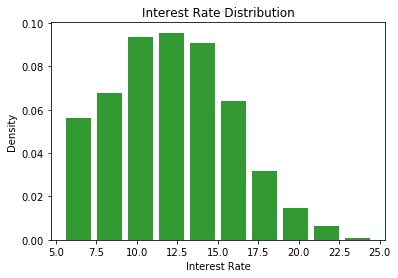

In [18]:
plt.hist(loan_data['int_rate'], density=True, color='green', alpha=0.8, rwidth = 0.8)
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate")
plt.ylabel("Density")
plt.show()

Interest rates between 10-15% appear to be the most common. 

Now, we want to analyze the distribution of loan grades among people who own their house, people who are paying their mortgages but don't own their house, and people who rent their house. Our hypothesis is that people who own their house will have better loans than those who are paying mortgages or rent their house. We assume that people who own their houses either have higher income or are older, which would allow for more credit history.  

We will start by subsetting the data for people who own their houses. 

In [19]:
loan_own_sub = loan_data[(loan_data.home_ownership == "OWN")]
loan_own_sub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
8,NaN,NaN,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,12000.0,12000.0,12000.0,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.71,330.76,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,10000.0,10000.0,10000.0,36 months,12.42,334.16,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


We want to groupby subgrade so that we can find the counts of each type of loan.

In [20]:
own_sub = loan_own_sub.groupby(['sub_grade']).count()['grade']
own_sub = pd.DataFrame(own_sub).reset_index()
own_sub = own_sub.rename(index = str, columns = {"grade" : "count"})

In [21]:
own_sub.sum()

sub_grade    A1A2A3A4A5B1B2B3B4B5C1C2C3C4C5D1D2D3D4D5E1E2E3...
count                                                     3251
dtype: object

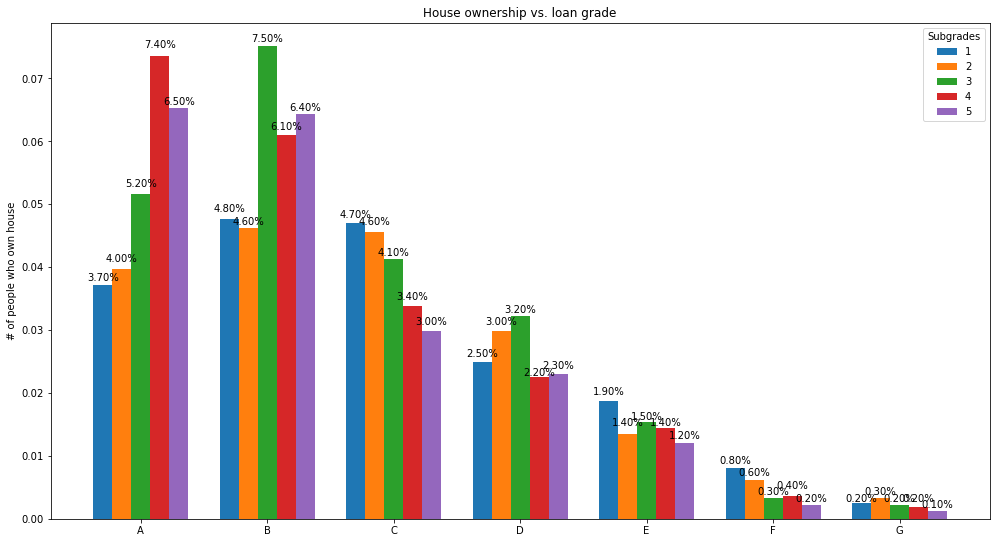

In [22]:
#Analyze quality of loans of people who own houses
import seaborn as sns

grade_1 = (121/3251, 155/3251, 153/3251, 81/3251, 61/3251, 26/3251, 8/3251)
grade_2 = (129/3251, 150/3251, 148/3251, 97/3251, 44/3251, 20/3251, 11/3251)
grade_3 = (168/3251, 244/3251, 134/3251, 105/3251, 50/3251, 11/3251, 7/3251) 
grade_4 = (239/3251, 198/3251, 110/3251, 73/3251, 47/3251, 12/3251, 6/3251)
grade_5 = (212/3251, 209/3251, 97/3251, 75/3251, 39/3251, 7/3251, 4/3251)

ind = np.arange(len(grade_1))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - 2*width, grade_1, width,
                label='1')
rects2 = ax.bar(ind - width, grade_2, width,
                label='2')
rects3 = ax.bar(ind, grade_3, width,
                label='3')
rects4 = ax.bar(ind + width, grade_4, width,
                label='4')
rects5 = ax.bar(ind + 2*width, grade_5, width,
                label='5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people who own house')
ax.set_title('House ownership vs. loan grade')
ax.set_xticks(ind)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F', 'G'))
ax.legend(title = "Subgrades")


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        height = round(height, 3)
        ax.annotate('{:.2%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.show()

The bar graph above shows the distribution of the loan grades of loans held by people who own their house. As we can see, the top 5 most common loan grades are B3, A4, A5, B5, and B4. 

Now, we will subset the data for people who are making mortgage payments, but don't own their house. 

In [23]:
loan_mort_sub = loan_data[(loan_data.home_ownership == "MORTGAGE")]
loan_mort_sub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
17,NaN,NaN,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,6000.0,6000.0,6000.0,36 months,11.71,198.46,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,15000.0,15000.0,15000.0,36 months,9.91,483.38,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,4375.0,4375.0,4375.0,36 months,7.51,136.11,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
mort_sub = loan_mort_sub.groupby(['sub_grade']).count()['grade']
mort_sub = pd.DataFrame(mort_sub).reset_index()
mort_sub = mort_sub.rename(index = str, columns = {"grade" : "count"})

In [25]:
mort_sub.sum()

sub_grade    A1A2A3A4A5B1B2B3B4B5C1C2C3C4C5D1D2D3D4D5E1E2E3...
count                                                    18959
dtype: object

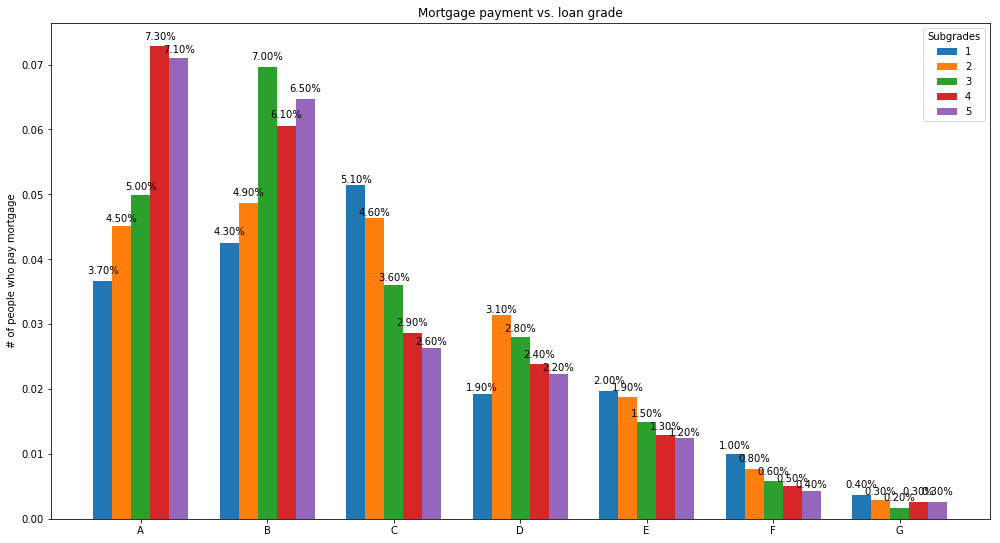

In [26]:
import seaborn as sns

#Analyze quality of loans of people who are currently paying mortgages


grade_1 = (695/18959, 807/18959, 974/18959, 364/18959, 374/18959, 188/18959, 70/18959)
grade_2 = (856/18959, 922/18959, 879/18959, 595/18959, 357/18959, 146/18959, 54/18959)
grade_3 = (945/18959, 1321/18959, 684/18959, 531/18959, 284/18959, 109/18959, 33/18959) 
grade_4 = (1380/18959, 1149/18959, 543/18959, 452/18959, 246/18959, 97/18959, 48/18959)
grade_5 = (1345/18959, 1226/18959, 499/18959, 422/18959, 236/18959, 80/18959, 48/18959)

ind = np.arange(len(grade_1))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - 2*width, grade_1, width,
                label='1')
rects2 = ax.bar(ind - width, grade_2, width,
                label='2')
rects3 = ax.bar(ind, grade_3, width,
                label='3')
rects4 = ax.bar(ind + width, grade_4, width,
                label='4')
rects5 = ax.bar(ind + 2*width, grade_5, width,
                label='5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people who pay mortgage')
ax.set_title('Mortgage payment vs. loan grade')
ax.set_xticks(ind)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F', 'G'))
ax.legend(title = "Subgrades")


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        height = round(height, 3)
        ax.annotate('{:.2%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.show()


The bar graph above shows the distribution of the loan grades of loans held by people who are making mortgage payments, but don't own their house. As we can see, the top 5 common loan grades are A4, A5, B3, B5, and B4. 

Now, we will subset the data for people who rent their house.  

In [27]:
loan_rent_sub = loan_data[(loan_data.home_ownership == "RENT")]
loan_rent_sub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rent_sub = loan_rent_sub.groupby(['sub_grade']).count()['grade']
rent_sub = pd.DataFrame(rent_sub).reset_index()
rent_sub = rent_sub.rename(index = str, columns = {"grade" : "count"})

In [29]:
rent_sub.sum()

sub_grade    A1A2A3A4A5B1B2B3B4B5C1C2C3C4C5D1D2D3D4D5E1E2E3...
count                                                    20181
dtype: object

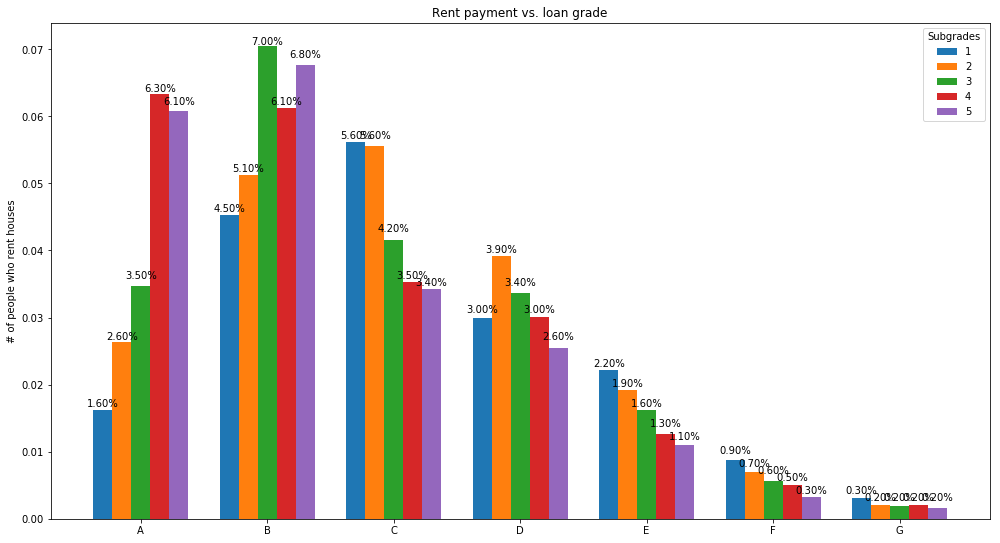

In [30]:
import seaborn as sns

#Analyze quality of loans of people who are renting their houses

grade_1 = (326/20181, 913/20181, 1133/20181, 603/20181, 448/20181, 178/20181, 62/20181)
grade_2 = (531/20181, 1034/20181, 1122/20181, 790/20181, 387/20181, 141/20181, 41/20181)
grade_3 = (700/20181, 1421/20181, 838/20181, 680/20181, 328/20181, 113/20181, 39/20181) 
grade_4 = (1279/20181, 1236/20181, 711/20181, 607/20181, 256/20181, 102/20181, 43/20181)
grade_5 = (1227/20181, 1366/20181, 691/20181, 515/20181, 223/20181, 66/20181, 31/20181)

ind = np.arange(len(grade_1))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - 2*width, grade_1, width,
                label='1')
rects2 = ax.bar(ind - width, grade_2, width,
                label='2')
rects3 = ax.bar(ind, grade_3, width,
                label='3')
rects4 = ax.bar(ind + width, grade_4, width,
                label='4')
rects5 = ax.bar(ind + 2*width, grade_5, width,
                label='5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people who rent houses')
ax.set_title('Rent payment vs. loan grade')
ax.set_xticks(ind)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F', 'G'))
ax.legend(title = "Subgrades")


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        height = round(height, 3)
        ax.annotate('{:.2%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.show()

The bar graph above shows the distribution of the loan grades of loans held by people who are renting their house. As we can see, the top 5 common loan grades are B3, B5, A4, A5, and B4. 

We notice that there is a much smaller percentage of people who rent their houses that are able to acquire grade A loans. This could be because people who rent their home have lower incomes. 

After comparing the distributions of the loan grades of people who own, mortgage, and rent their house, we find that our initial hypothesis was incorrect: people who are paying their mortgages tend to have better loans than people who own or rent their house. A possible reason for this outcome is that people who are currently paying their mortgages have an active record of making mortgage payments on time, so they are able to get better loans. 

Using a seaborn plot, we looked at grades for 36 month and 60 month loans for loan grades A-G.

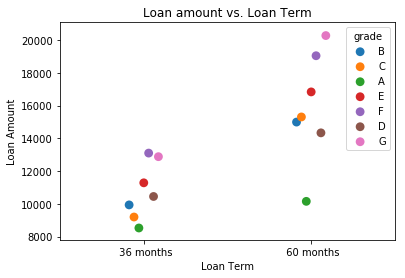

In [31]:
ax = sns.pointplot(x="term", y="loan_amnt", hue="grade", dodge=True, ci=0,  join=False, data=loan_data)

ax.set_xlabel("Loan Term")
ax.set_ylabel("Loan Amount")
ax.set_title("Loan amount vs. Loan Term");

In general, grade-A 36-month loans were the lowest loan amount, while grade-G 60-month loans are the highest loan amounts. A possible explanation for this is because grade-A loans have the lowest risk and lower loan amounts correlate with less risk and less reward. On the other hand, high loan amounts are riskier, thus explaining the lower grade-G rating.

Below is a chart summarizing loan grades, terms, and amounts.

In [32]:
loan_amnt_GradeAndTerm = loan_data.groupby(['grade','term']).mean()['loan_amnt']

In [33]:
pd.DataFrame(loan_amnt_GradeAndTerm)

loan_amnt
grade term                    
A      36 months   8528.365829
       60 months  10153.367580
B      36 months   9936.485927
       60 months  14989.201835
C      36 months   9197.634816
       60 months  15301.261468
D      36 months  10450.565082
       60 months  14332.002769
E      36 months  11283.647194
       60 months  16829.407549
F      36 months  13097.336562
       60 months  19035.782658
G      36 months  12878.863636
       60 months  20266.010274

## Question 3: Do certain words in the loan descriptions correlate with higher loan grade quality? What are the common reasons for loans?

For this question, we wanted to know how Lending Club borrowers described each loan and to see if borrowers stated different reasons for needing high-grade versus low-grade loans.

To answer how certain words in the loan descriptions correlate with higher loan grade quality, we used the nltk package for natural language processing. First, we removed all the unnecessary punctuation and a few words that were of no value because they were in every column. We then made a normalized list in which we were able to split the entire text into individual words. From there, we were able to look at the highest frequency of words in loan descriptions.

In [34]:
# Display options
pd.options.display.max_colwidth

# Gather text data
text = loan_data['desc'].dropna()
textdf = pd.DataFrame({'idx': text.index,
                       'words': text})

textdf.head()

,idx,words
0,0,Borrower added on 12/22/11 > I need to upgra...
1,1,Borrower added on 12/22/11 > I plan to use t...
3,3,Borrower added on 12/21/11 > to pay for prop...
4,4,Borrower added on 12/21/11 > I plan on combi...
6,6,Borrower added on 12/18/11 > I am planning o...


We can see above that the descriptions for each loan is very brief. Below, we will set up the necessary functions to normalize the text.

In [35]:
text = textdf['words']

### Normalize Text

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # tockenizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# import necessary modules
import re
import string
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

First, we removed all the unnecessary punctuation and a few words that were of no value because they were in every column.

In [38]:
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [39]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
def remove_stopwords(text,stopword_list):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [40]:
def remove_custom(text):
    tokens = tokenize_text(text)
    additional_list = frozenset(('borrower', 'add', 'br'))
    filtered_tokens2 = [token for token in tokens if token not in additional_list]
    filtered_text = ' '.join(filtered_tokens2) 
    return filtered_text

In [41]:
from nltk import pos_tag
from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

    tagged_text = pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

We lemmatize our text based on POS tags to make it easier to work with. 

In [42]:
# lemmatize text based on POS tags    
def lemmatize_text(text):
    text = tokenize_text(text)
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [43]:
# Text normalization pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import re

def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def normalize_text(text,tokenize=False):
    text = lemmatize_text(text)
    text = remove_special_characters(text)
    text = text.lower()
    text = remove_stopwords(text,ENGLISH_STOP_WORDS)
    text = remove_custom(text)
    text = keep_text_characters(text)

    return text

In [44]:
print("Example sentence:", text[0])
print("Normalized sentence:", normalize_text(text[0]))

Example sentence:   Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
Normalized sentence: need upgrade business technologies


### Run each loan description into normalizer

Now that we are able to normalize the data, we will take all normalize each description for each loan in the dataset. We will put this in *normalized_list*.

In [45]:
# Normalize all the descriptions
normalized_list = []

for word_entry in text:
    normalized_list.append(normalize_text(word_entry))

Below we will take every short loan descriptions and transform it into one large list of single words.

In [46]:
from nltk.tokenize import word_tokenize

single_word_list = []

for entry in normalized_list:
    tk = word_tokenize(entry)
    for i in tk:
        single_word_list.append(i)

single_word_list[0:10]

['need',
 'upgrade',
 'business',
 'technologies',
 'plan',
 'use',
 'money',
 'finance',
 'motorcycle',
 'look']

### Explore the words we have

Now, we will analyze each word's part of speech.

In [47]:
# Quick exploration of the words
from nltk.tag import pos_tag_sents
nltk.download('averaged_perceptron_tagger')
pos_tag_text(single_word_list[0:10])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('need', 'n'),
 ('upgrade', 'a'),
 ('business', 'n'),
 ('technologies', 'n'),
 ('plan', 'v'),
 ('use', 'v'),
 ('money', 'n'),
 ('finance', 'n'),
 ('motorcycle', 'n'),
 ('look', 'n')]

As seen from above, “loan”, “pay”, “credit”, “card” “debt”, “payment” and “year” were the most commonly used words (each word was used over 10,000 times!) in our dataset. Other common words such as “job”, “work”, and “consolidate” may also help explain certain reasons for loans. This makes sense because these words below are related to loans.

From there, we were able to look at the highest frequency of words in loan descriptions.

In [48]:
fdist = nltk.FreqDist(single_word_list)
fdist

FreqDist({'loan': 31094, 'pay': 30872, 'credit': 27169, 'card': 20808, 'debt': 17431, 'payment': 16059, 'year': 15523, 'use': 10128, 'time': 8977, 'job': 8764, ...})

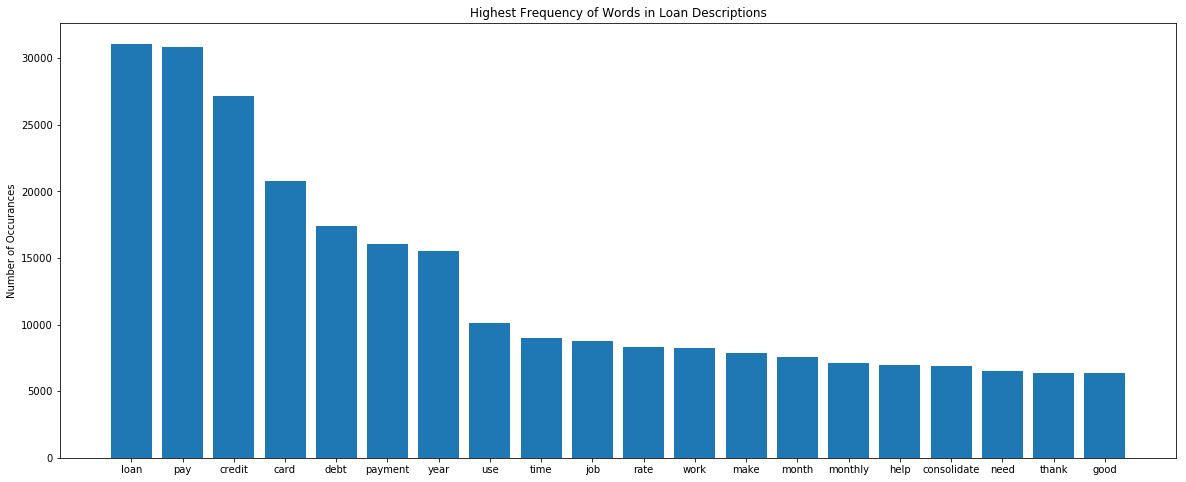

In [49]:
# # Draw a bar chart with the count of the most common words
# import matplotlib.pyplot as plt
x, y = zip(*fdist.most_common(n=20)) # Unzip the tuples into lists
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.xticks(range(len(x)), x)
plt.title("Highest Frequency of Words in Loan Descriptions")
plt.ylabel("Number of Occurances")
plt.show()

From the chart above, we see that the most common word in loan descriptions is (not surprisingly) "loan." Some of the other common words, "credit", "card", and "debt", are expected because loans are commonly used to pay off credit cards and other debt obligations.

Below we are exploring the different uses of the word "loan" and what context it is in.

In [50]:
from nltk import Text
 
textCon = Text(single_word_list)

textCon.concordance('loan')

Displaying 25 of 31094 matches:
 central ac need replace m sorry let loan expire time plan combine large free 
d surprise brother fix house recived loan citi financial year ago pay intrest 
 lending club account money purchase loan really look forward help family than
eally look forward help family thank loan medical procedure ve wait year hope 
ear college spend control stable job loan plan pay credit card close immediate
card stable job spending control use loan consolidate credit card debt close i
e saving cover month expense include loan payment absolutely dollar dedicate d
card stable job spending control use loan consolidate credit card debt close i
e saving cover month expense include loan payment absolutely dollar dedicate d
ge spend control stable job hope use loan pay credit card close immediately mo
onthly income balance living expense loan repayment thank amass credit card de
ear college spend control stable job loan plan pay credit card close immediate
olutely problem make

We also looked at a biplot to see how frequently certain words are paired together. “Credit Card”, “Pay Credit”, “Monthly Payment”, and “Consolidate Credit” are among the most frequently paired together words. Based on these observations, it seems likely that paying off credit card debt and consolidate crediting are among the most common reasons for users requesting loans.

[(('credit', 'card'), 17558), (('pay', 'credit'), 3944), (('card', 'debt'), 3917), (('loan', 'pay'), 3069), (('monthly', 'payment'), 2924), (('pay', 'loan'), 2592), (('pay', 'debt'), 2160), (('pay', 'time'), 2117), (('plan', 'use'), 1953), (('consolidate', 'credit'), 1889)]


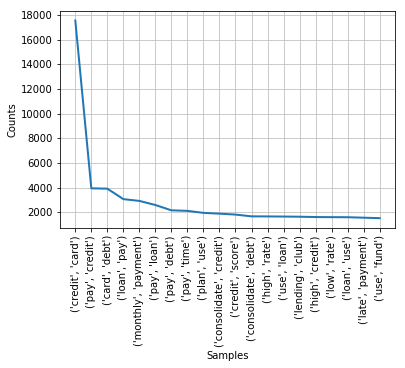

In [51]:
biTradeWords = nltk.bigrams(single_word_list)
biFdist = nltk.FreqDist(biTradeWords)
print(biFdist.most_common(10))
biFdist.plot(20, cumulative=False)

Finally, we will creat a scatter text plot that displays the frequency of words used while describing high-grade and low-grade loans. In order to do this plot, we gathered the descriptinos and their subgrades.

In [52]:
word_df = pd.DataFrame({'words': normalized_list})
word_df['sub_grade'] = loan_data['sub_grade']
word_df.head()

,words,sub_grade
0,need upgrade business technologies,B2
1,plan use money finance motorcycle look plan pa...,C4
2,pay property tax borrow friend need pay centra...,C5
3,plan combine large free extra month pay ve goo...,C1
4,plan use fund pay retail credit card rate majo...,B5


Now we will divide the grades into Low and High. We defined the High-Grade loans to be grades A, B, and C while the Low-Grade loans are D, E, F, and G.

In [53]:
for i in range(len(word_df['sub_grade'])):
    if ('A' in word_df.iloc[i,1] or 'B' in word_df.iloc[i,1] or 'C' in word_df.iloc[i,1]):
        word_df.iloc[i,1] = 'High Grade'
    else:
        word_df.iloc[i,1] = 'Low Grade'

word_df.head()

,words,sub_grade
0,need upgrade business technologies,High Grade
1,plan use money finance motorcycle look plan pa...,High Grade
2,pay property tax borrow friend need pay centra...,High Grade
3,plan combine large free extra month pay ve goo...,High Grade
4,plan use fund pay retail credit card rate majo...,High Grade


In [54]:
#!pip install scattertext
#!pip install spacy
#!pip install pprint

import scattertext as st
import spacy
from pprint import pprint

Below, if you uncomment the code, it will create an interactive html plot. We have already created it and put it in the directory as "Convention-Visualization.html".

In [55]:
# Create scatter text plot

nlp = st.whitespace_nlp_with_sentences
corpus = st.CorpusFromPandas(word_df, 
                             category_col='sub_grade', 
                             text_col='words',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(corpus,
                                       category='High Grade',
                                       category_name='High Grade',
                                       not_category_name='Low Grade',
                                       term_scorer=st.RankDifference(),
                                       width_in_pixels=1000,)
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

8168855

The code above creates an interactive html plot which you can find in the same directory as this notebook. We printed the image PNG version down below.

## Graph explanation
### The axes

The x axis is the dense ranking of the terms for Low Grade Loans and the y axis is the dense ranking of the terms for High Grade Loans. For example, the x axis dense ranking would rank the most frequent words used in Low Grade Loan descriptions as 1, the second most frequent as 2, and so on. Words that are rank 1 (most frequent) would appear in the far right on the x axis. This works similarly for the y axis and High Grade Loan descriptions.

### Graph Colors

The colors for each point were determined using the dense rank differences. In this context, the dense rank differences are computed using $$RankDiff = \frac{\rho_{low}(y_{low})}{d_{low}}-\frac{\rho_{high}(y_{high})}{d_{high}}$$

where $\rho_{high}(y_{high})$ is the rank of the word for the High Grade Loan and $\rho_{low}(y_{low})$ is the rank of the same word for the Low Grade Loan. Additionally, $d_{high}$ and $d_{low}$ are the frequences of the word for the High and Low Grade Loans.

These difference were calculated for each word. If the dense rank sum difference is 0, the point is assigned the color yellow, if it is largely positive, the point is assigned blue, and if it is negative, the point is assigned red. This is a continuous color scale, so the darker the blue, the more positive the dense rank sum, which means the word is more associated with High Grade Loan descriptions. The darker red means a more negative dense rank sum and the word is more associated with Low Grade Loan descriptions.


### The bottom left

Lastly, if you look at the bottom left of the plot, you can see interesting lines that are formed that look parallel or somewhat linear. This occurs because the plot is done in a way such that the ties computed in the dense rank of a word is broken through alphabetical ordering. Otherwise, many words words used once in both categories would stack up on one another. This allows for better spacing.

For example, in our plot, the words 'assignment', 'invoice', and 'thanksgiving' were each used once for both High Grade Loans and once for Low Grade Loans. Firstly, the rank difference would be zero, so the color would be yellow. Also, by being last in rank, this essentially would put the words in the bottom left of graph. But to avoid overcrowding, the points are organized in an alphabetical fashion with the word 'thanksgving' closer to the bottom left of the graph and the other point up towards the top right. 

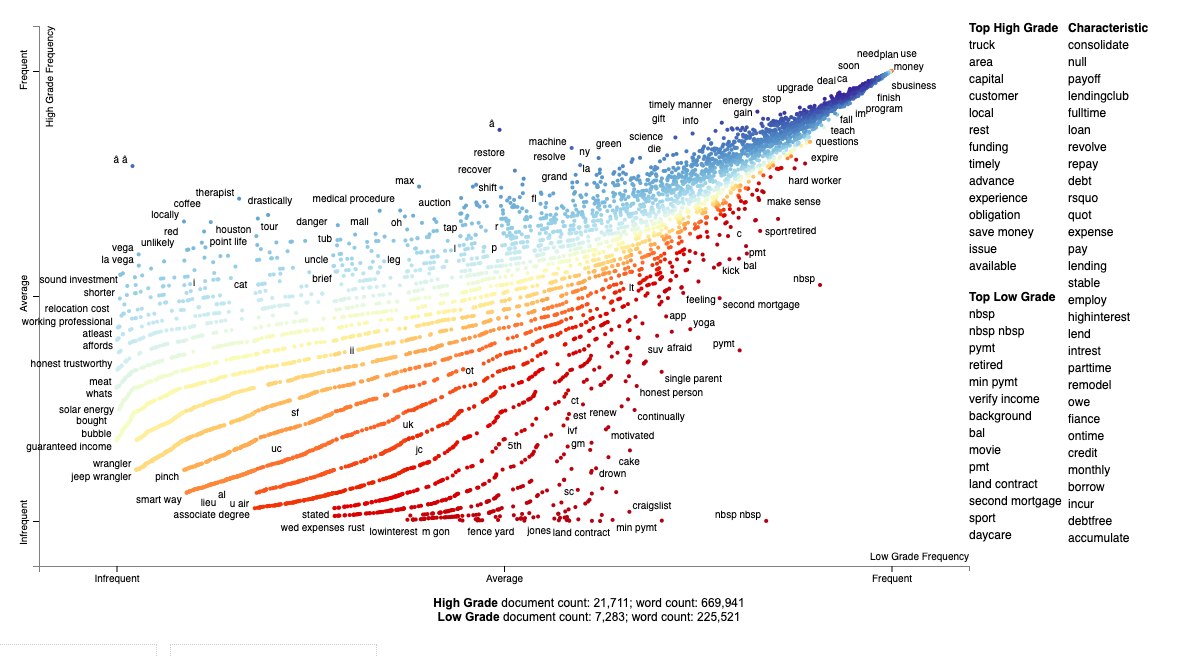

In [56]:
# Display image
from IPython.display import Image
Image(filename='scattertextPlot.png') 

Using the TF-IDF model or the Term Frequency-Inverse Document Frequency we can do topic modeling and extract various distinguishiable topics from our normalized vector list or loan descriptions.

In [57]:
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/feature_extractors.py

In [58]:
# TF-IDF 
import numpy as np
from feature_extractors import tfidf_transformer
from feature_extractors import bow_extractor    

def tf_idf(corpus):
    # Bag of words construction
    bow_vectorizer, bow_features = bow_extractor(corpus=corpus)
    # feature names
    feature_names = bow_vectorizer.get_feature_names()
    # TF-IDF    
    tfidf_trans, tdidf_features = tfidf_transformer(bow_features)
    tdidf_features = np.round(tdidf_features.todense(),2)
    return((tdidf_features, feature_names))

We decided to take a random sample of 1000 loan descriptions because of computational limits.

In [59]:
import random
random.seed(134)
normalized_subset = random.sample(normalized_list, 1000)

In [60]:
tdidf_features,feature_names = tf_idf(normalized_subset)

After using the TF-IDF, we employed non-negative matrix factorization to approximate and seperate individual words from loan descriptions. For our NMF, our X matrix is an $n$ by $d$ matrix, where $n$ is the words and $d$ is the descriptions. This is split into a $W$ and $H$. For our analysis, $W$ is a $d x t$ matrix, with $t$ being the number of bins/topics chosen and $H$ is a $txn$ matrix.

In [61]:
X = tdidf_features.T

In [62]:
X.shape # (words, loan descriptions1)

(3800, 1000)

In [63]:

## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components,train_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, 
                     init='nndsvda', max_iter=500, 
                     random_state=0)
    W = model.fit_transform(train_data)
    H = model.components_
    nmf = (W,H)
    return(nmf)

We decided to do topic analysis for the 5 most prominent topics.

In [64]:
# page 246
r = 5 # no. of topics
W_topic5,H_topic5 = \
    non_negative_marix_decomp(n_components = r, train_data = X)

In [65]:
# View feature names
# feature_names

In the topic analysis we can see that Topic 1 consists of payment words includeing "card", "pay", and "balance". Topic 2 has words like "job", "plan", and "work". By looking at all 5 topics, we cannot conclude a clear separation of topics. This is because each descriptions is short and contains similar words all related to loans. We can confirm that all the descriptions are similar to each other by plotting a cross-correlation heat map.

In [66]:
def extract_topic_top_words(W, all_words, num_top_words=10):
    
    num_words, num_topics = W.shape
    
    assert num_words == len(all_words)
    
    for t in range(0, num_topics):
        top_words_idx = np.argsort(W[:,t])[::-1]  # descending order
        top_words_idx = top_words_idx[:num_top_words]
        top_words = [all_words[k] for k in top_words_idx]
        top_words_shares = W[top_words_idx, t]
        print('# Topic', t+1)
        for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
            print(word, share)
        print('\n')
        
extract_topic_top_words(W_topic5, feature_names)

# Topic 1
credit 1.2562412537312602
card 1.2542857684917492
pay 0.721676457726811
high 0.5349008886709293
rate 0.4115874823975996
like 0.24726739479352525
want 0.1475081920065277
balance 0.14182188105789637
low 0.13629879546375953
apr 0.12722252187045718


# Topic 2
pay 0.7720190619669322
year 0.6758110518596405
time 0.6071585152841932
job 0.5916105062677103
plan 0.47007079155583514
money 0.4517419912231684
use 0.43393290274859436
help 0.4267343443892515
work 0.413831211002462
fund 0.4059853790105068


# Topic 3
consolidation 1.5839560335746752
debt 1.3177262417583766
null 0.15235747635549082
free 0.1235622422855822
loan 0.11763329471561473
simple 0.08034942556412022
family 0.07653097739704712
help 0.07255301459225783
job 0.06686659794134353
dept 0.059503197769308604


# Topic 4
consolidate 1.7031786754692322
payment 1.187882418331352
monthly 0.6345895558609406
debt 0.5785431231690376
rate 0.4478956207327542
low 0.41066935869888976
card 0.21789903721049406
make 0.18499267139469422
late

In [67]:
num_topics, num_descriptions = H_topic5.shape

H5df = pd.DataFrame(H_topic5, 
                     index=['topic'+str(one) for one in range(1, num_topics+1)], 
                     columns=['descriptions'+str(one) for one in range(1, num_descriptions+1)])

In [68]:
H5df

,descriptions1,descriptions2,descriptions3,descriptions4,descriptions5,descriptions6,descriptions7,descriptions8,descriptions9,descriptions10,...,descriptions991,descriptions992,descriptions993,descriptions994,descriptions995,descriptions996,descriptions997,descriptions998,descriptions999,descriptions1000
topic1,0.114111,0.141332,0.000000,0.000000,0.000000,0.000000,0.190559,0.078975,0.086528,0.011022,...,0.166628,0.093901,0.148906,0.130925,0.183883,0.000000,0.023844,0.093493,0.000000,0.000000
topic2,0.058304,0.048537,0.029553,0.035099,0.186222,0.006087,0.000000,0.078725,0.064733,0.062225,...,0.000000,0.029740,0.117272,0.039893,0.102727,0.070930,0.117017,0.053334,0.023619,0.061388
topic3,0.032036,0.106361,0.047418,0.000000,0.020973,0.000000,0.050959,0.000000,0.000000,0.007506,...,0.070491,0.036062,0.024490,0.041694,0.000000,0.000000,0.000000,0.004226,0.030696,0.003269
topic4,0.000000,0.010130,0.047558,0.000000,0.016727,0.000000,0.011679,0.000000,0.000000,0.000000,...,0.011235,0.079006,0.016246,0.054382,0.096577,0.029552,0.000000,0.007443,0.056806,0.000000
topic5,0.077589,0.000000,0.065479,0.087035,0.000000,0.067383,0.066145,0.000000,0.000000,0.013448,...,0.061416,0.000000,0.019624,0.024982,0.000000,0.000000,0.000000,0.037085,0.076568,0.020930


This heatmap confirms our suspicion that most descriptions in the data set are related (high cross-correlation) and are very difficult to separate into distinct topics. We can see this from the mostly red heat mep, indicating high cross-correlation.

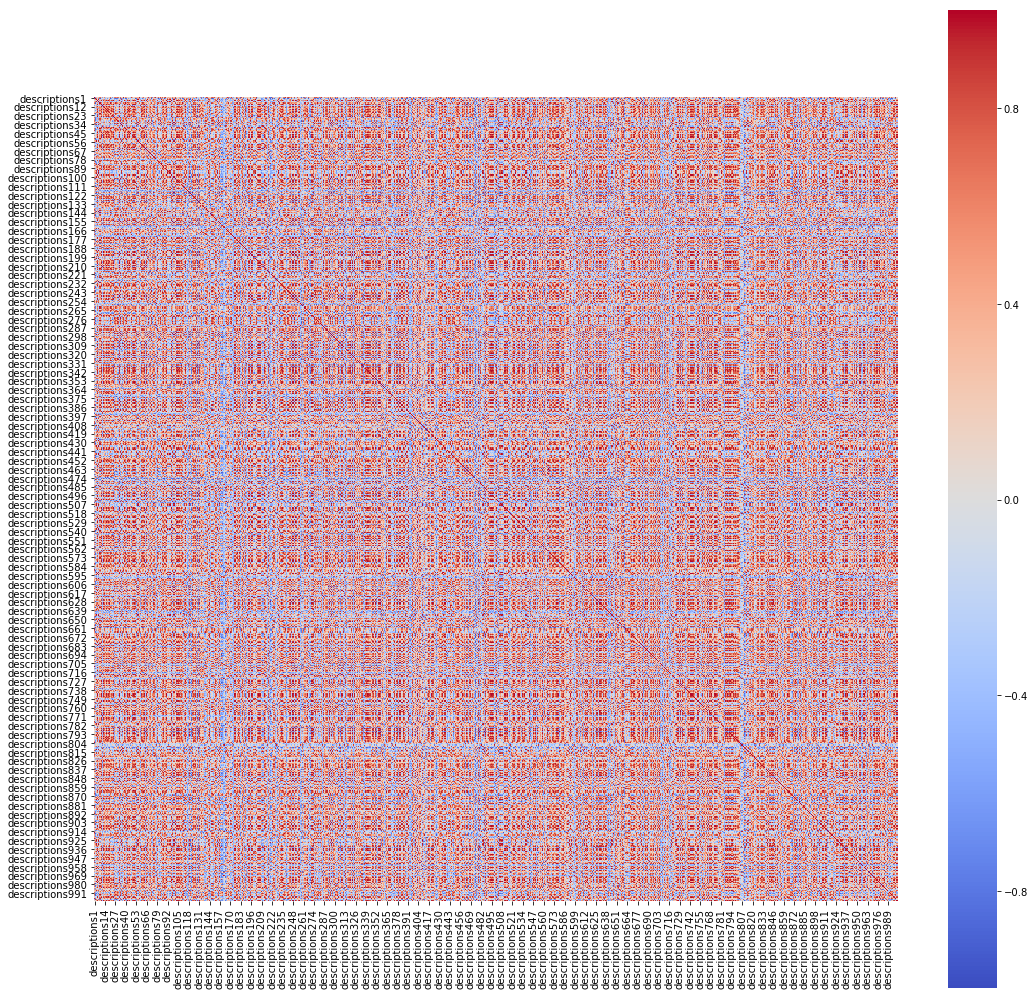

In [69]:
review_corr = H5df.corr()

%matplotlib inline

plt.figure(figsize=(18,18))
ax = sns.heatmap(review_corr, square=True, cmap="coolwarm");

Below we created a quick simulation of using descriptions highly correlated to description 808. These are simulations of loan descriptions.

In [70]:
vec_normalize = lambda x: x / sum(x) 
Hnorm = H5df.apply(vec_normalize, axis=0)

description_sim_808 = review_corr.index[review_corr['descriptions808'] > 0.95].to_list()
full_desc = dict(zip(review_corr.columns.values, normalized_subset))
for one in description_sim_808:
    print(full_desc[one], end='\n\n')

debt consolidation loan want payoff account close thank investor financial hardship family able sell remodeled house accumulate lot debt maintain good credit time track money bank account close debt excite track loan nt

debt consolidation loan great credit want debt stable job job year loan help debt

fund use pay high loan ve current position yr importantly time payment debt consolidation null

loan debt consolidation job stable pay time

use loan payoff following debt ge money currently gm visa bank america visa citifancial room irs tax liability debt irs low rate pay short term debt high pay month debt low card create terrible debt invest property improvement home post ridge dr improvement landscaping project create situation cost earn month recently sell home absolute determination debt free year thank opportunity low loan pay aggressive reasonable time

hello seek consolidation loan rack shortterm debt graduate school ready able pay timely manner forward financial goal thank



### Classification Using Naive Bayes Classifier

Now we will try to classify the descriptions into two categories: High Grade and Low Grade loans

In [186]:
# Get subset of word data
random.seed(134)
word_df_High = word_df[word_df.sub_grade == "High Grade"]

word_df_Low = word_df[word_df.sub_grade == "Low Grade"]

word_df_H_sub = word_df_High.sample(n=500, replace=False)
word_df_L_sub = word_df_Low.sample(n=500, replace=False)

word_df_sub = pd.concat([word_df_H_sub, word_df_L_sub])

In [187]:
# Creat Train and Test Sets
random.seed(1)

corpusGrade = word_df_sub.values.tolist()
random.shuffle(corpusGrade)

size = int(len(corpusGrade) * 0.2)
train_set, test_set = corpusGrade[size:], corpusGrade[:size]

In [188]:
# View Train set
train_set[0:5]

[['m request loan repair toyota supra road', 'Low Grade'],
 ['people catch credit card issuer rush raise rate low spending limit good customer miss late payment lender credit card issuer entire credit history bofa s computer model decide rate need increase astronomically amex blue card fixed rate lower credit limit balance benefit low rate completely negate hit fico score credit available account look ahead financial picture great m lawyer irony current financial climate business boom result bank merger real estate foreclosure debt incur bad marriage ex deadbeat probably ride m seek fixedinterest loan transfer bofa mastercard balance m swim upstream anymore',
  'High Grade'],
 ['look consolidate credit card debt rate originally attractive increase government allow control pay creditor time refuse let rich insane rate registered nurse nursing field year begin certified nursing assistant rn just begin work family behavioral health nurse home visit desire help homebound love career regard

In [189]:
# View test set
test_set[0:5]

[['debt consolidation basically look loan help consolidate credit card debt lump sum rate low control huge help efficient pay multiple directions',
  'Low Grade'],
 ['wipe cash reserve used credit card install new furnace make home repair pay people time credit card company roll exist lend club loan loan payment',
  'Low Grade'],
 ['consolidation high loan credit card debt', 'High Grade'],
 ['return home live abroad couple year accrue small pile debt job search year work great local nonprofit ve carry little mountain month finally ready zero large meltdown financial world maybe just tiresome burden make little dent pay period wake make realize financial responsibility just important ethical responsibility lead healthy life thanks great program provide exciting model microfinance honestly look forward participate ve clear hurdle',
  'Low Grade'],
 ['new loan', 'High Grade']]

In [190]:
#!pip install textblob
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

In [191]:
# Train model
random.seed(1)
model = NBC(train_set) 

In [192]:
# Find model accuracy
random.seed(1)
model.accuracy(test_set)

0.535

In [195]:
# Input custom sentence
sentence = 'Paying off my student loans'
model.classify(sentence)

'Low Grade'

## Overview of classisfication above

We used the naive bayes classifier for our data set which contained 1000 loan descriptions and labels ('High Grade' and 'High Grade'). We trained the classifier on 500 High Grade loan descriptions and 500 Low Grade loan descriptions and got an accuracy of 53.5%. This is barely better than guessing which would have an accuracy of 50%.

## Why the model does not work

The algorithm works by the formula $prior$ x $word\_contribution = label\_likelihood$

The prior is the frequency of each class in the data set. For us, it is 0.5 because there are 500 High and 500 Low Grade loan descriptions. 

The word contribution is calculated by how the feature is distributed throughout the documents. For example, if the word 'retired' appeared in 10% of Low Grade loan descriptions and 2% of High Grade loan descriptions, then the Low Grade label would be multiplied by 0.1 and the High Grade by 0.02.

We would do this for every word in the descriptions and assign the description to the label with the higher likelihood.

The main reason why this model did not generlize well is because the loan descriptions for High Grade and Low Grade loans are incredibly similar. The words 'credit card' and 'payment' are used in both class descriptions. There is no clear distinction between the categories. They all talk about a loan without polarizing language. Words like 'incredible loan' or 'very risky' were not used.

## Conclusion

In conclusion, we found that income and loan amounts by state are closely related. Maine was the oddball state when comparing interest rates, income, and loan amounts. For the most part, interest rates on West Coast and East Coast are higher than those in Midwest. Similarly, Midwestern states have lower incomes, while East and West Coast states have higher incomes. Users living in states with higher incomes also tend to heave higher cost of living, which may cause people to take out bigger loans. 

We also disproved our initial hypothesis that homeowners have better quality loans than people who are currently paying their mortgage or renting their house. People who are paying their currently have a better loan quality distribution, followed by people who own their house, and people who rent their house. 

The average interest rates by loan grade are as follows:

In [73]:
loan_data.groupby(['grade']).mean()['int_rate']

grade
A     7.342708
B    11.014209
C    13.499889
D    15.577149
E    17.376768
F    19.265304
G    20.451250
Name: int_rate, dtype: float64

We also observed that people tend to take out larger loans for a longer duration of time. The larger and longer the loan, the riskier it is, and the lower the grade becomes. 

When analyzing borrowers' reasons for taking out loans, we found that "credit card", "pay credit", "monthly payment", and "consolidate credit" are the most frequently paired together words. This conclusion implies that paying off credit card debt and consolidating credit are common reasons for Lending Club members to take out loans. 

   We found that high-grade loans, on average have an interest rate between 7.5 and 13%. We verified this by plotting the interest rates against the different grade loans. On the other hand, Low-grade loans tend to have an interest rate between 13% and 20%. This creates a clear incentive to get high-grade loans. Our hypothesis of the difference in interest rates between high grade and low-grade loans was confirmed. Our hypothesis that one of the primary uses of Lending Club was for debt refinancing was also confirmed; words like credit card and debt appeared very frequently in our language analysis of loan descriptions. In the future, we would like to build a predictive model; specifically, given the features of a potential borrower, we would like to predict their interest rate. We would like to narrow down the influential predictors – potentially using Lasso Regression. We would like to compare major financial/political events to the distributions of the lending club data to see how they correlate. We would like to continue to infer the characteristics of the optimal borrower from our data set. We would like to compare the data to future Lending Club data set to see how their clients change and to bank data to see how lending club borrowers differ from traditional borrowers. There are also many other apps in the same market as Lending Club, such as SoFi, that we’d like to compare the data too. 
